# Description Length

In [1]:
import pandas as pd
import numpy as np
import nltk

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
import utils

In [2]:
evo_df = pd.read_csv('./data/csv/output.csv')

In [11]:
evo_df["field"].unique()

array(['Summary', 'Description', 'VersionsAffected', 'IssueType',
       'Project', 'Components', 'CreatedDate', 'ResolvedDate', 'Status',
       'Priority', 'Creator', 'Reporter', 'Comments', 'Resolution',
       'IssueLinks', 'Labels', 'Environment', 'VersionsFixed', 'Assignee',
       'TimeEstimateOriginal', 'TimeEstimateRemaining', 'Rank', 'Parent',
       'Sprint', 'TimeSpent', 'Flagged'], dtype=object)

In [13]:
evo_df.head(10)

,Unnamed: 0,jira,issue_id,history_order,field,field_evo_order,field_evo_first,field_evo_last,data_from,data_to,...,last_creator,last_reporter,last_assignee,last_commenter,last_evolver,prev_creators,prev_reporters,prev_assignees,prev_commenters,prev_evolvers
0,18323789,Jira,1803818,0,Summary,0,True,True,NaN,Sourcetree crashes,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
1,18323790,Jira,1803818,0,Description,0,True,True,NaN,"Source tree crashes everytime i open , I have ...",...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
2,18323791,Jira,1803818,0,VersionsAffected,0,True,True,NaN,3.4.4,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
3,18323792,Jira,1803818,0,IssueType,0,True,True,NaN,Bug,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
4,18323793,Jira,1803818,0,Project,0,True,True,NaN,Sourcetree for Windows,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
5,18323794,Jira,1803818,0,Components,0,True,True,NaN,Git,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
6,18323795,Jira,1803818,0,CreatedDate,0,True,True,NaN,2021-09-13T05:48:08.000+0000,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
7,18323796,Jira,1803818,0,ResolvedDate,0,True,True,NaN,2021-11-18T15:12:59.000+0000,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
8,18323797,Jira,1803818,0,Status,0,True,False,NaN,Needs Triage,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
9,18323798,Jira,1803818,0,Priority,0,True,True,NaN,Low,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]


# Full Dataset
between 40 and 76 ?

### Preprocessing

In [14]:
df_desc = evo_df[evo_df["field"] == "Description"]
df_desc_processed = df_desc.filter(['issue_id', 'history_order', 'field_evo_order', 'data_from', 'data_to'], axis=1)
df_desc_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508270 entries, 1 to 8753323
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   issue_id         508270 non-null  int64 
 1   history_order    508270 non-null  int64 
 2   field_evo_order  508270 non-null  int64 
 3   data_from        148478 non-null  object
 4   data_to          507812 non-null  object
dtypes: int64(3), object(2)
memory usage: 23.3+ MB


In [15]:
df_desc_processed['word_count'] = df_desc_processed['data_to'].str.count(' ') + 1
df_desc_processed.sort_values('issue_id')
df_desc_processed.head(5)

,issue_id,history_order,field_evo_order,data_from,data_to,word_count
1,1803818,0,0,NaN,"Source tree crashes everytime i open , I have ...",14.0
19,1795802,0,0,NaN,"During an in-app update, the update failed sta...",14.0
36,1795162,0,0,NaN,"During an in-app update, the update failed sta...",14.0
52,1794394,0,0,NaN,"When trying to update to 3.4.6, a checksum err...",10.0
69,1788469,0,0,NaN,"once when I was using Sourcetree v2.1.11, ever...",131.0


In [16]:
df_desc_processed.to_csv("data/csv/description_df.csv")

### Visualization

In [8]:
df = pd.read_csv('./data/csv/description_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508270 entries, 0 to 508269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       508270 non-null  int64  
 1   issue_id         508270 non-null  int64  
 2   history_order    508270 non-null  int64  
 3   field_evo_order  508270 non-null  int64  
 4   data_from        148478 non-null  object 
 5   data_to          507812 non-null  object 
 6   character_count  507812 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 27.1+ MB


In [9]:
df.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,character_count
count,5.082700e+05,5.082700e+05,508270.000000,508270.000000,5.078120e+05
mean,4.043629e+06,5.386467e+06,1.519706,0.617988,1.184053e+03
std,2.562913e+06,6.006094e+06,4.574682,2.023670,9.320622e+03
min,1.000000e+00,1.013600e+04,0.000000,0.000000,1.000000e+00
25%,1.803922e+06,2.798470e+05,0.000000,0.000000,2.130000e+02
50%,3.801098e+06,8.518940e+05,0.000000,0.000000,4.320000e+02
75%,6.224043e+06,1.256776e+07,1.000000,1.000000,8.530000e+02
max,8.753323e+06,1.441846e+07,358.000000,94.000000,2.843103e+06


In [47]:
y = df["word_count"]
size = len(df.index)
removed_outliers = y.between(y.quantile(.10), y.quantile(.90))
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

408820/508270 data points remain.


In [48]:
removed_outliers_df = df[removed_outliers]
removed_outliers_df.head()

,Unnamed: 0,issue_id,history_order,field_evo_order,data_from,data_to,word_count
0,1,1803818,0,0,NaN,"Source tree crashes everytime i open , I have ...",14.0
1,19,1795802,0,0,NaN,"During an in-app update, the update failed sta...",14.0
2,36,1795162,0,0,NaN,"During an in-app update, the update failed sta...",14.0
4,69,1788469,0,0,NaN,"once when I was using Sourcetree v2.1.11, ever...",131.0
5,90,1756847,0,0,NaN,"Hi folks,\r\n\r\nrecently I noticed a problem ...",58.0


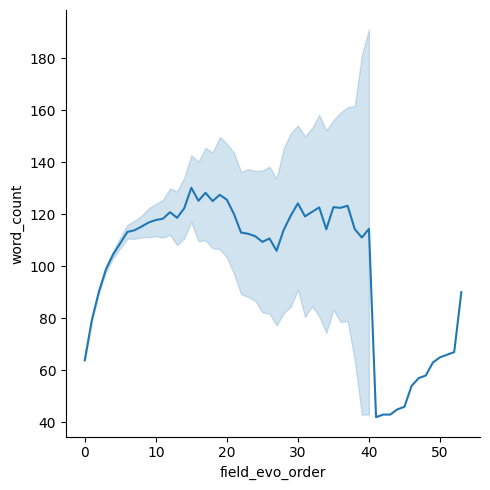

In [49]:
sns.relplot(data=removed_outliers_df, kind="line", x="field_evo_order", y="word_count", facet_kws=dict(sharex=False),)

<Axes: xlabel='field_evo_order', ylabel='word_count'>

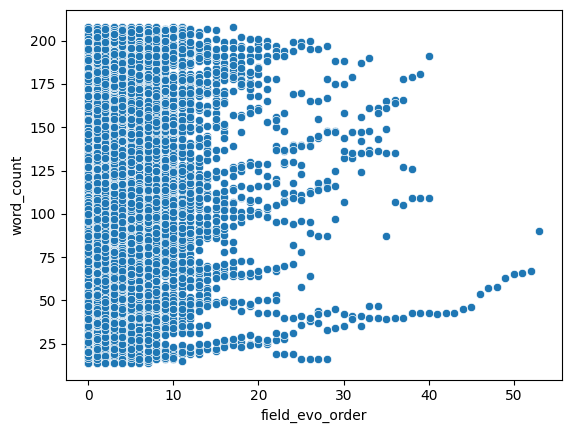

In [50]:
sns.scatterplot(data=removed_outliers_df, x="field_evo_order", y="word_count")

<Axes: xlabel='field_evo_order', ylabel='word_count'>

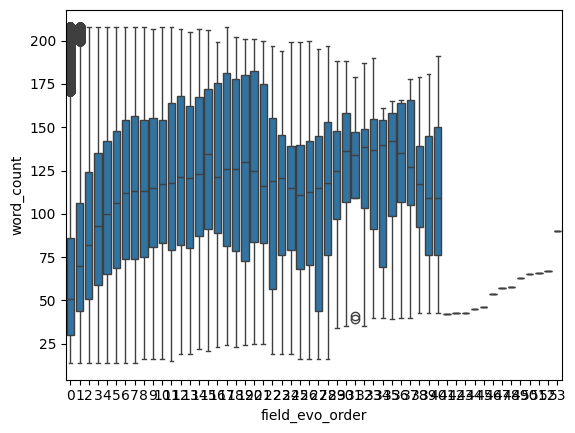

In [51]:
sns.boxplot(data=removed_outliers_df, x="field_evo_order", y="word_count")

# By IssueType

### Preprocessing

In [17]:
evo_df = pd.read_csv('./data/csv/output.csv')

In [18]:
evo_df_reduced = evo_df.filter(['issue_id', 'history_order', 'field', 'field_evo_order', 'data_from', 'data_to'], axis=1)
evo_df_reduced = evo_df_reduced.loc[(evo_df_reduced["field"] == "Description") | (evo_df_reduced["field"] == "IssueType")]
evo_df_reduced["field"].unique()


# Create a dictionary to store 'IssueType' values for each 'issue_id'
issue_type_dict = {}

In [19]:
# Iterate over each row of the DataFrame
for index, row in evo_df_reduced.iterrows():
    # Check if the value in the 'field' column is 'IssueType'
    if row['field'] == 'IssueType':
        # Store the 'IssueType' value for the corresponding 'issue_id'
        issue_type_dict[row['issue_id']] = row['data_to']


In [20]:
# Fill the 'issueType' column with values from the dictionary
evo_df_reduced['issue_type'] = evo_df_reduced['issue_id'].map(issue_type_dict)

In [21]:
evo_df_reduced.head(10)

,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type
1,1803818,0,Description,0,NaN,"Source tree crashes everytime i open , I have ...",Bug
3,1803818,0,IssueType,0,NaN,Bug,Bug
19,1795802,0,Description,0,NaN,"During an in-app update, the update failed sta...",Bug
21,1795802,0,IssueType,0,NaN,Bug,Bug
36,1795162,0,Description,0,NaN,"During an in-app update, the update failed sta...",Bug
38,1795162,0,IssueType,0,NaN,Bug,Bug
52,1794394,0,Description,0,NaN,"When trying to update to 3.4.6, a checksum err...",Bug
54,1794394,0,IssueType,0,NaN,Bug,Bug
69,1788469,0,Description,0,NaN,"once when I was using Sourcetree v2.1.11, ever...",Bug
76,1788469,0,IssueType,0,NaN,Bug,Bug


In [22]:
evo_df_preprocessed = evo_df_reduced[evo_df_reduced["field"] == "Description"]

In [23]:
evo_df_preprocessed['character_count'] = evo_df_preprocessed['data_to'].str.len()

# evo_df_preprocessed['word_count'] = evo_df_preprocessed['data_to'].str.count(' ') + 1
evo_df_preprocessed.sort_values('issue_id')
evo_df_preprocessed.head(5)

/var/folders/5p/613flb0s6c92xjsqzfyxwwk80000gn/T/ipykernel_39438/3665636867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evo_df_preprocessed['character_count'] = evo_df_preprocessed['data_to'].str.len()


,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type,character_count
1,1803818,0,Description,0,NaN,"Source tree crashes everytime i open , I have ...",Bug,82.0
19,1795802,0,Description,0,NaN,"During an in-app update, the update failed sta...",Bug,168.0
36,1795162,0,Description,0,NaN,"During an in-app update, the update failed sta...",Bug,168.0
52,1794394,0,Description,0,NaN,"When trying to update to 3.4.6, a checksum err...",Bug,114.0
69,1788469,0,Description,0,NaN,"once when I was using Sourcetree v2.1.11, ever...",Bug,770.0


In [24]:
evo_df_preprocessed.to_csv("data/csv/description_charCount_by_issuetype_df.csv")

### Visualization

In [2]:
df = pd.read_csv('./data/csv/description_charCount_by_issuetype_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508270 entries, 0 to 508269
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       508270 non-null  int64  
 1   issue_id         508270 non-null  int64  
 2   history_order    508270 non-null  int64  
 3   field            508270 non-null  object 
 4   field_evo_order  508270 non-null  int64  
 5   data_from        148478 non-null  object 
 6   data_to          507812 non-null  object 
 7   issue_type       508270 non-null  object 
 8   character_count  507812 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 34.9+ MB


In [3]:
df.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,character_count
count,5.082700e+05,5.082700e+05,508270.000000,508270.000000,5.078120e+05
mean,4.043629e+06,5.386467e+06,1.519706,0.617988,1.184053e+03
std,2.562913e+06,6.006094e+06,4.574682,2.023670,9.320622e+03
min,1.000000e+00,1.013600e+04,0.000000,0.000000,1.000000e+00
25%,1.803922e+06,2.798470e+05,0.000000,0.000000,2.130000e+02
50%,3.801098e+06,8.518940e+05,0.000000,0.000000,4.320000e+02
75%,6.224043e+06,1.256776e+07,1.000000,1.000000,8.530000e+02
max,8.753323e+06,1.441846e+07,358.000000,94.000000,2.843103e+06


In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))
# between 210 and 850 characters

,Unnamed: 0,issue_id,history_order,field_evo_order,character_count
count,508270,508270,508270,508270,507812
mean,4.04363e+06,5.38647e+06,1.51971,0.617988,1184.05
std,2.56291e+06,6.00609e+06,4.57468,2.02367,9320.62
min,1,10136,0,0,1
25%,1.80392e+06,279847,0,0,213
50%,3.8011e+06,851894,0,0,432
75%,6.22404e+06,1.25678e+07,1,1,853
max,8.75332e+06,1.44185e+07,358,94,2.8431e+06
